# Understanding the Inverse Seesaw in the DLRSM

In this notebook we follow the implementation of the ISS in the work [Low scale left-right symmetry and naturally small neutrino mass](https://link.springer.com/article/10.1007/JHEP02(2019)045)

In [2]:
from sympy import MatrixSymbol, BlockMatrix, init_printing, ZeroMatrix, symbols, Identity, block_collapse
from sympy import DiagonalMatrix
from potential_senjanovic_HiggsDoublets import change_scalar_fields, change_scalar_fields_approx
init_printing()

If $m_D^\prime = 0$ and $m_D = \xi M_D$

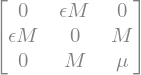

In [3]:
n = 3
MD = MatrixSymbol('M', n,n)
#MD = DiagonalMatrix(MD)
mu = MatrixSymbol(r'mu', n,n)
#mu = DiagonalMatrix(mu)
Z1 = ZeroMatrix(n,n)
In = Identity(n)
epsilon = symbols(r'\epsilon', positive=True)


MLRiss_mDp0 = BlockMatrix(
    [
        [Z1, epsilon*MD*In, Z1],
        [epsilon*MD*In, Z1, MD*In],
        [Z1, MD*In, mu*In]
    ]
)
MLRiss_mDp0

In [4]:
from sympy import cos, sin, tan

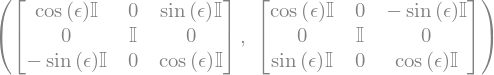

In [5]:

Us = BlockMatrix(
    [
        [cos(epsilon)*In, Z1, sin(epsilon)*In],
        [Z1, In, Z1],
        [-sin(epsilon)*In, Z1, cos(epsilon)*In]
    ]
)
UsT = Us.T
Us, UsT

In [6]:
# change_scalar_fields

In [7]:
# change_scalar_fields_approx

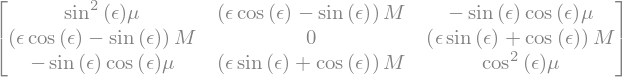

In [8]:
UsTMLRissUs = block_collapse(UsT*MLRiss_mDp0*Us)
UsTMLRissUs

In [9]:
block_collapse(UsTMLRissUs.blocks[0,1])

In [10]:
from sympy import solve, sqrt

In [11]:
sinxi_sol = solve(epsilon*cos(epsilon) - sin(epsilon), sin(epsilon), dict=True)[0]
sinxi_sol

In [12]:
tanxi_sol = {tan(epsilon):(sin(epsilon)/cos(epsilon)).subs(sinxi_sol)}
tanxi_sol

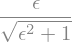

In [13]:
sinxi_approx = epsilon/sqrt(1 + epsilon**2)
sinxi_approx

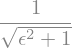

In [14]:
cosxi_approx = 1/sqrt(1 + epsilon**2)
cosxi_approx

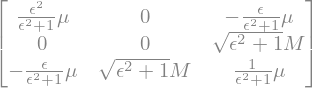

In [15]:
UsTMLRissUs_sym = block_collapse(UsTMLRissUs.subs(sin(epsilon), sinxi_approx).subs(cos(epsilon), cosxi_approx)).simplify()
UsTMLRissUs_sym

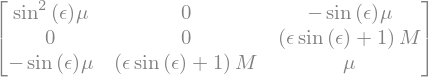

In [16]:
UsTMLRissUs_sym_sinxi = block_collapse(block_collapse(UsTMLRissUs.subs(cos(epsilon), 1)).simplify().subs(epsilon - sin(epsilon), 0))
UsTMLRissUs_sym_sinxi

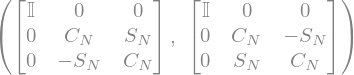

In [17]:
CN = MatrixSymbol('C_N', 3,3)
CNdiag = DiagonalMatrix(CN)
SN = MatrixSymbol('S_N', 3,3)
SNdiag = DiagonalMatrix(SN)
UN = BlockMatrix(
    [
        [In, Z1, Z1],
        [Z1, CN*In, SN*In],
        [Z1, -SN*In, CN*In]
    ]
)
UNT = BlockMatrix(
    [
        [In, Z1, Z1],
        [Z1, CN*In, -SN*In],
        [Z1, SN*In, CN*In]
    ]
)
UN, UNT

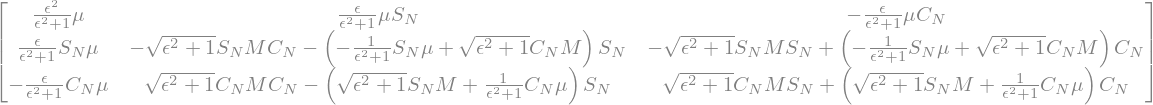

In [18]:
UNTUsTMLRissUsUN = block_collapse(UNT*UsTMLRissUs_sym*UN)#.subs(cos(xi),1)
UNTUsTMLRissUsUN

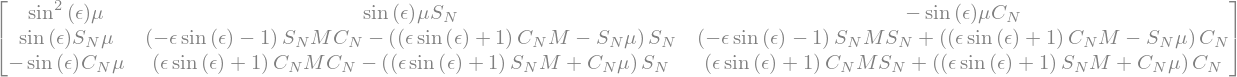

In [19]:
UNTUsTMLRissUsUN_sinxi = block_collapse(UNT*UsTMLRissUs_sym_sinxi*UN)
UNTUsTMLRissUsUN_sinxi

In [20]:
from sympy.physics.quantum import Dagger

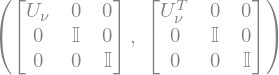

In [21]:
Unu = MatrixSymbol(r'U_{\nu}', 3,3)
Unu_matrix = BlockMatrix(
    [
        [Unu, Z1, Z1],
        [Z1, In, Z1],
        [Z1, Z1, In]
    ]
)
Unu_matrixT = BlockMatrix(
    [
        [Unu.T, Z1, Z1],
        [Z1, In, Z1],
        [Z1, Z1, In]
    ]
)
Unu_matrix, Unu_matrixT

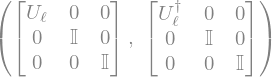

In [22]:
Ul = MatrixSymbol(r'U_{\ell}', 3,3)
Ul_matrix = BlockMatrix(
    [
        [Ul, Z1, Z1],
        [Z1, In, Z1],
        [Z1, Z1, In]
    ]
)
Ul_matrixDagger = BlockMatrix(
    [
        [Dagger(Ul), Z1, Z1],
        [Z1, In, Z1],
        [Z1, Z1, In]
    ]
)
Ul_matrix, Ul_matrixDagger

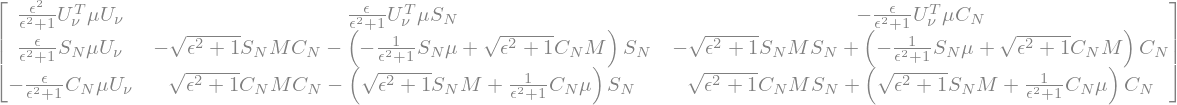

In [23]:
UnuTUNTUsTMLRissUsUNUnu = block_collapse(Unu_matrixT*UNTUsTMLRissUsUN*Unu_matrix)
UnuTUNTUsTMLRissUsUNUnu

In [24]:
from sympy import pi

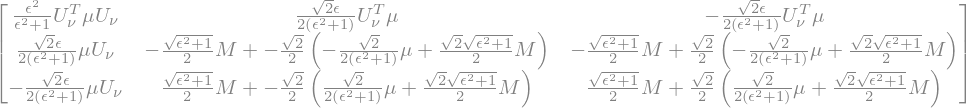

In [25]:
UnuTUNTUsTMLRissUsUNUnu = block_collapse(
    UnuTUNTUsTMLRissUsUNUnu.subs(CN, cos(pi/4)*In).subs(
        SN, sin(pi/4)*In
    )
)
UnuTUNTUsTMLRissUsUNUnu

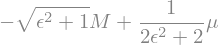

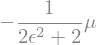

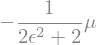

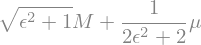

In [26]:
for i in range(1,3):
    for j in range(1,3):
        blij = UnuTUNTUsTMLRissUsUNUnu.blocks[i,j]
        blij_collapsed = block_collapse(blij.expand())
        display(blij_collapsed)
        UnuTUNTUsTMLRissUsUNUnu = UnuTUNTUsTMLRissUsUNUnu.subs(blij, blij_collapsed) 

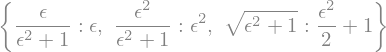

In [27]:
xi_approximations = {
    (sin(epsilon)**2).subs(sin(epsilon), sinxi_approx): (sin(epsilon)**2).subs(sin(epsilon), sinxi_approx).series(epsilon, 0, 3).removeO(),
    epsilon/(1 + epsilon**2): (epsilon/(1 + epsilon**2)).series(epsilon, 0, 3).removeO(),
    sqrt(1 + epsilon**2):(sqrt(1 + epsilon**2)).series(epsilon, 0, 3).removeO()
}
xi_approximations

In [28]:
UnuDaggerUNTUsTMLRissUsUNUnu = UnuTUNTUsTMLRissUsUNUnu.subs(xi_approximations)

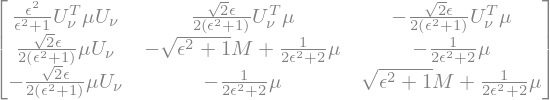

In [29]:
UnuTUNTUsTMLRissUsUNUnu

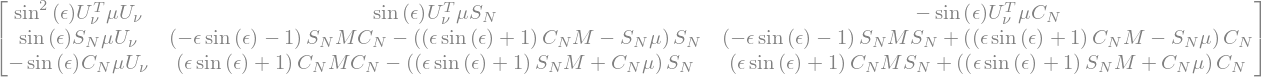

In [30]:
UnuTUNTUsTMLRissUsUNUnu_sinxi = block_collapse(Unu_matrixT*UNTUsTMLRissUsUN_sinxi*Unu_matrix)
UnuTUNTUsTMLRissUsUNUnu_sinxi

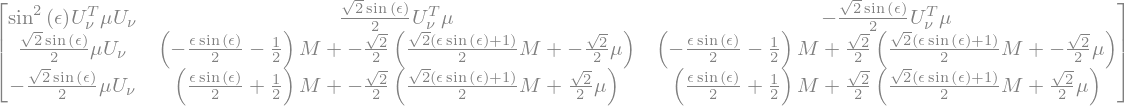

In [31]:
UnuTUNTUsTMLRissUsUNUnu_sinxi = block_collapse(UnuTUNTUsTMLRissUsUNUnu_sinxi.subs(CN, cos(pi/4)*In).subs(SN, sin(pi/4)*In))
UnuTUNTUsTMLRissUsUNUnu_sinxi

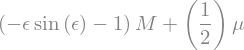

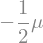

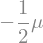

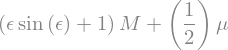

In [32]:
for i in range(1,3):
    for j in range(1,3):
        blij = UnuTUNTUsTMLRissUsUNUnu_sinxi.blocks[i,j]
        blij_collapsed = block_collapse(blij.expand().simplify())
        display(blij_collapsed)
        UnuTUNTUsTMLRissUsUNUnu_sinxi = UnuTUNTUsTMLRissUsUNUnu_sinxi.subs(blij, blij_collapsed) 

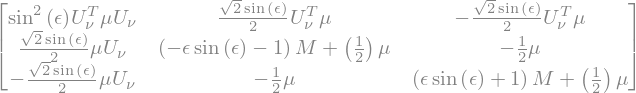

In [33]:
UnuTUNTUsTMLRissUsUNUnu_sinxi

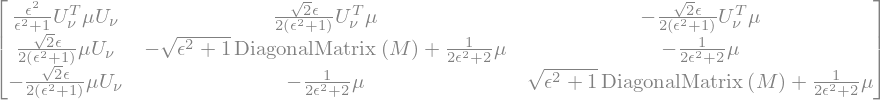

In [34]:
UnuTUNTUsTMLRissUsUNUnu_diag = block_collapse(
    UnuTUNTUsTMLRissUsUNUnu.subs(
    MD, DiagonalMatrix(MD)
)
)
UnuTUNTUsTMLRissUsUNUnu_diag

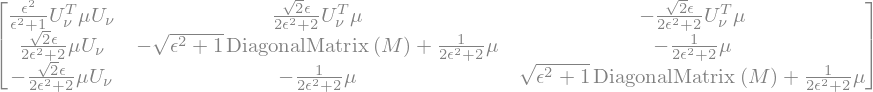

In [35]:
mnu = DiagonalMatrix(MatrixSymbol(r'm_\nu',3,3))
UnuTUNTUsTMLRissUsUNUnu_diag = UnuTUNTUsTMLRissUsUNUnu_diag.subs(
    epsilon**2*Unu.T*mu*Unu, mnu
    #mu,(1/epsilon**2)*Unu*mnu*Unu.T
)
UnuTUNTUsTMLRissUsUNUnu_diag

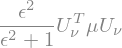

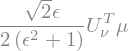

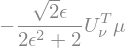

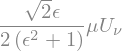

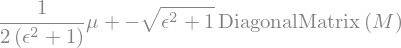

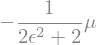

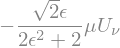

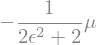

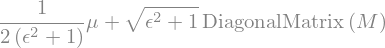

In [36]:
for i in range(0,3):
    for j in range(0,3):
        blij = UnuTUNTUsTMLRissUsUNUnu_diag.blocks[i,j]
        blij_collapsed = block_collapse(blij.expand().simplify())
        display(blij_collapsed)
        UnuTUNTUsTMLRissUsUNUnu_diag= UnuTUNTUsTMLRissUsUNUnu_diag.subs(blij, blij_collapsed) 

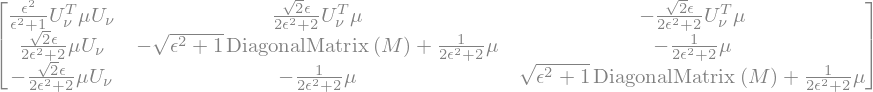

In [37]:
UnuTUNTUsTMLRissUsUNUnu_diag.subs(Unu.T*Unu, In)

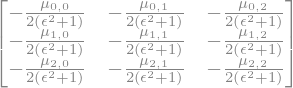

In [38]:
block_collapse(UnuTUNTUsTMLRissUsUNUnu_diag.blocks[1,2]).as_explicit().applyfunc(lambda x:x.factor())

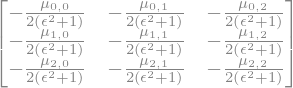

In [39]:
block_collapse(UnuTUNTUsTMLRissUsUNUnu_diag.blocks[2,1]).as_explicit().applyfunc(lambda x:x.factor())

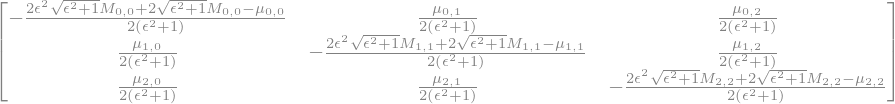

In [40]:
block_collapse(UnuTUNTUsTMLRissUsUNUnu_diag.blocks[1,1]).as_explicit().applyfunc(lambda x:x.factor())

In [41]:
#zeta = symbols(r'\zeta')
#Uzeta = BlockMatrix(
#    [
#        [In, Z1, Z1],
#        [Z1, cos(zeta)*In, -sin(zeta)*In],
#        [Z1, sin(zeta)*In, cos(zeta)*In]
#    ]
#)
#Uzeta

In [42]:
#UZTMUZM = block_collapse(Uzeta.T*block_collapse(UnuDaggerUNTUsTMLRissUsUNUnu_diag.subs(xi,0))*Uzeta)
#UZTMUZM

In [43]:
#block_collapse(UZTMUZM.blocks[2,2]).as_explicit().applyfunc(lambda x:x.factor().trigsimp().subs(zeta, pi/4))

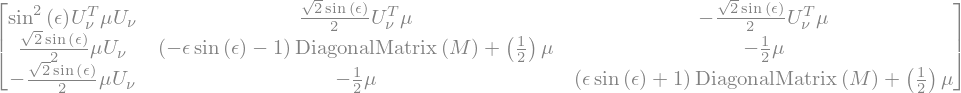

In [44]:
UnuTUNTUsTMLRissUsUNUnu_diag_sinxi = block_collapse(
    UnuTUNTUsTMLRissUsUNUnu_sinxi.subs(
    MD, DiagonalMatrix(MD)
)#.subs(CN, cos(pi/4)*In).subs(SN, sin(pi/4)*In)
)
UnuTUNTUsTMLRissUsUNUnu_diag_sinxi

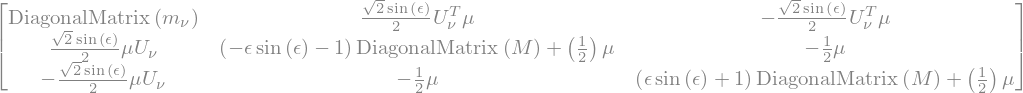

In [45]:
UnuTUNTUsTMLRissUsUNUnu_diag_sinxi = UnuTUNTUsTMLRissUsUNUnu_diag_sinxi.subs(
    sin(epsilon)**2*Unu.T*mu*Unu, mnu
    #mu,(1/sin(epsilon)**2)*Unu*mnu*Unu.T
)
UnuTUNTUsTMLRissUsUNUnu_diag_sinxi

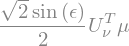

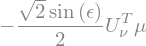

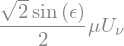

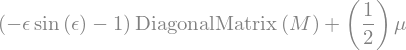

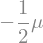

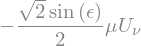

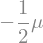

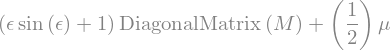

In [46]:
for i in range(0,3):
    for j in range(0,3):
        blij = UnuTUNTUsTMLRissUsUNUnu_diag_sinxi.blocks[i,j]
        blij_collapsed = block_collapse(blij.expand().simplify())
        display(blij_collapsed)
        UnuTUNTUsTMLRissUsUNUnu_diag_sinxi= UnuTUNTUsTMLRissUsUNUnu_diag_sinxi.subs(blij, blij_collapsed) 

In [47]:
UnuTUNTUsTMLRissUsUNUnu_diag_sinxi = UnuTUNTUsTMLRissUsUNUnu_diag_sinxi.subs(Unu.T*Unu, In)

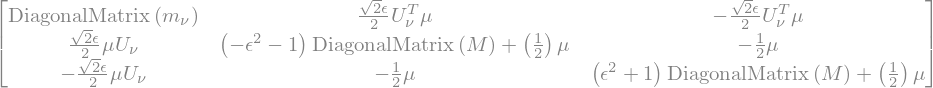

In [48]:
block_collapse(UnuTUNTUsTMLRissUsUNUnu_diag_sinxi.subs(sin(epsilon), epsilon))

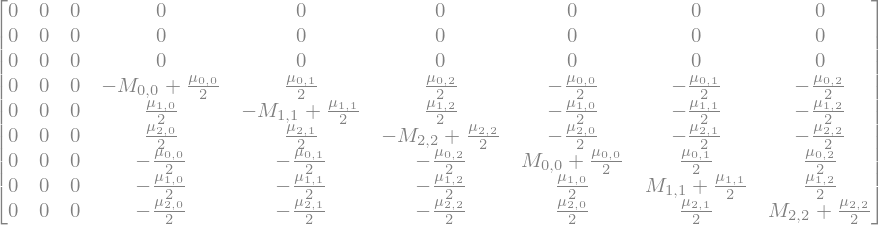

In [49]:
UnuTUNTUsTMLRissUsUNUnu_explicit = UnuTUNTUsTMLRissUsUNUnu_diag.subs(epsilon, 0).as_explicit()
UnuTUNTUsTMLRissUsUNUnu_explicit

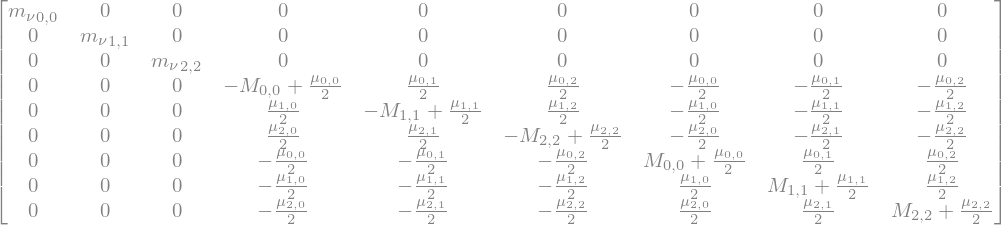

In [50]:
UnuTUNTUsTMLRissUsUNUnu_explicit_sinxi = UnuTUNTUsTMLRissUsUNUnu_diag_sinxi.subs(epsilon, 0).as_explicit()
UnuTUNTUsTMLRissUsUNUnu_explicit_sinxi

In [51]:
SNi_changes = {
    SNdiag[0,0]:(1-(mu[0,0])/(4*MD[0,0]))/sqrt(2),
    SNdiag[1,1]:(1-(mu[1,1])/(4*MD[1,1]))/sqrt(2),
    SNdiag[2,2]:(1-(mu[2,2])/(4*MD[2,2]))/sqrt(2)
}

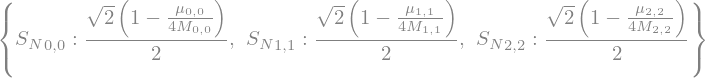

In [52]:
SNi_changes

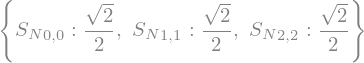

In [53]:
SNi_changes0 = {}
for sn in SNi_changes:
    SNi_changes0[sn] = sin(pi/4)
SNi_changes0

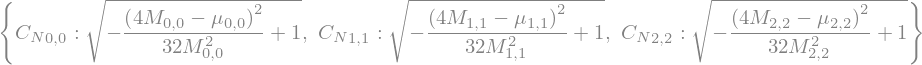

In [54]:
CNi_changes = {}
for key, sn in SNi_changes.items():
    cn = sqrt((1 - sn.simplify()**2).simplify())
    CNi_changes[key.replace(SN, CN)] = cn
CNi_changes

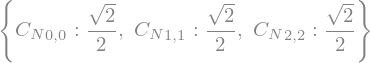

In [55]:
CNi_changes1 = {}
for cn in CNi_changes:
    CNi_changes1[cn] = cos(pi/4)
CNi_changes1

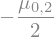

In [56]:
UnuTUNTUsTMLRissUsUNUnu_explicit[3,-1].subs(SNi_changes0).subs(CNi_changes1)#.args[4].args[-1].args

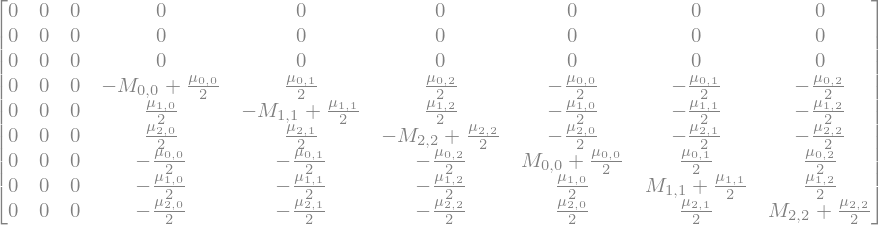

In [57]:
Mblock = UnuTUNTUsTMLRissUsUNUnu_explicit.subs(
    SNi_changes0
).subs(
    CNi_changes1
).applyfunc(lambda x:x.expand()).applyfunc(block_collapse)#.subs(xi, 0)
Mblock

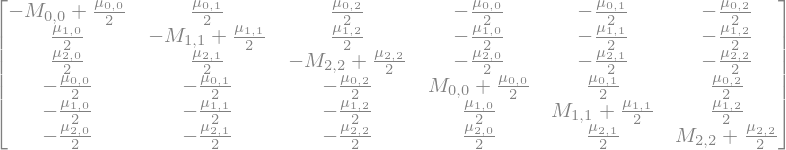

In [58]:
Mblock[3:,3:]

In [59]:
from sympy import eye

In [60]:
Upmns_unitary_relations = {
    key:value for key, value in zip(
        list((Unu.T*Unu).as_explicit()),
        list(eye(3))
    )
}
Upmns_unitary_relations

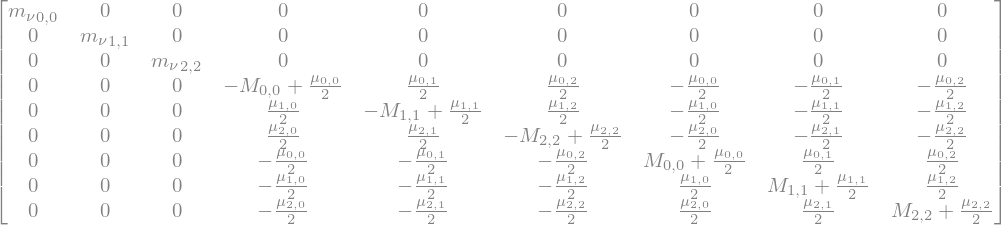

In [61]:
UnuTUNTUsTMLRissUsUNUnu_explicit_sinxi.subs(
    SNi_changes0
).subs(
    CNi_changes1
).applyfunc(lambda x:x.expand()).subs(
    sin(epsilon), epsilon
)#.subs(xi**2, 0)

In [62]:
from sympy import conjugate

The PMNS matrix is given by
$$U_\text{PMNS} = U_\ell^\dagger U_\nu^*$$
$$U_\text{PMNS}^\dagger = U_\nu^\top U_\ell$$
$$U_\text{PMNS}^\dagger U_\text{PMNS} = U_\nu^\top U_\ell U_\ell^\dagger U_\nu^* = U_\nu^\top U_\nu^*=(U_\nu^\dagger U_\nu)^* = I^* = I$$

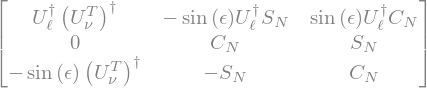

In [63]:
Uf = block_collapse((Dagger(Ul_matrix)*Us*UN*conjugate(Unu_matrix)).subs(cos(epsilon), 1))
Uf

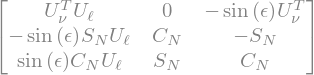

In [64]:
Ufinv = block_collapse((Unu_matrix.T*UNT*UsT*Ul_matrix).subs(cos(epsilon), 1))
Ufinv

$$U_\nu^\dagger (U_\ell^\top)^\dagger = (U_\ell^\top U_\nu)^\dagger=(U_\ell^\dagger U_\nu^*)^\top$$
$$U_\nu^\top (U_\ell) = (U_\ell^\top U_\nu)^\top = (U_\ell^\dagger U_\nu^*)^\dagger$$
$$U_\nu^\top (U_\nu^\top)^\dagger = U_\nu^\top U_\nu^* = (U_\nu^\dagger U_\nu)^* = I^* = I$$

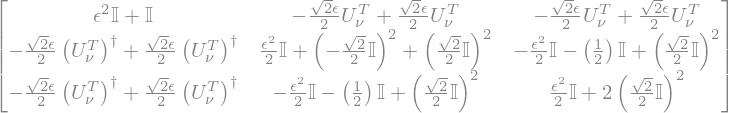

In [65]:
Upmns = MatrixSymbol(r'U_{\text{PMNS}}', 3,3)

UfinvUf = block_collapse(
    (Ufinv*Uf).subs(
        sin(epsilon), epsilon
    ).replace(
        CN, cos(pi/4)*In
    ).replace(
        SN, sin(pi/4)*In
    ).subs(Dagger(Ul)*conjugate(Unu), Upmns).subs(Unu.T*Ul, Dagger(Upmns))
).subs(
    Ul*Upmns, conjugate(Unu)
).subs(
    Dagger(Upmns)*Dagger(Ul), Unu.T
).subs(
    Unu.T*Unu, In
).subs(
    Ul*Dagger(Ul), In
).subs(
    Unu.T*conjugate(Unu),In
).subs(
    Dagger(Upmns)*Upmns, In
)
UfinvUf


In [66]:
for i in range(0,3):
    for j in range(0,3):
        blij = UfinvUf.blocks[i,j]
        blij_collapsed = block_collapse(blij.expand())
        #display(blij_collapsed)
        UfinvUf = UfinvUf.subs(blij, blij_collapsed) 

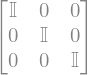

In [67]:
block_collapse(
    UfinvUf.subs((sqrt(2)/2*In)**2, In/2).subs((-sqrt(2)/2*In)**2, In/2).subs(epsilon, 0)
)

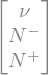

In [68]:
nu = MatrixSymbol(r'\nu', 3,1)
Nm = MatrixSymbol('N^-', 3,1)
Np = MatrixSymbol('N^+', 3,1)
Nu = BlockMatrix(
    [
        [nu],
        [Nm],
        [Np]
    ]
)
Nu

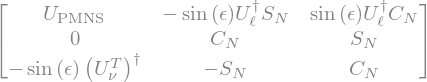

In [69]:
Uf.subs(Dagger(Ul)*conjugate(Unu), Upmns)

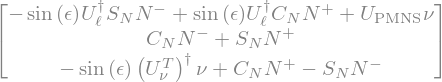

In [70]:
Nuweak = block_collapse(Uf*Nu).subs(Dagger(Ul)*conjugate(Unu), Upmns).factor()
Nuweak

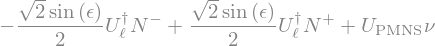

In [71]:
block_collapse(Nuweak.blocks[0].replace(CN, cos(pi/4)*In).replace(SN, sin(pi/4)*In))

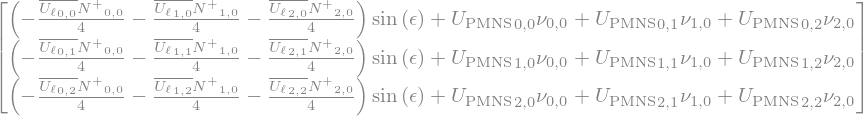

In [72]:
Nuweak.blocks[0].replace(CN, cos(pi)/4*In).replace(SN, sin(pi)/4*In).as_explicit(

)

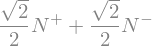

In [73]:
block_collapse(Nuweak.blocks[1].replace(CN, cos(pi/4)*In).replace(SN, sin(pi/4)*In))

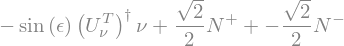

In [74]:
block_collapse(Nuweak.blocks[2].replace(CN, cos(pi/4)*In).replace(SN, sin(pi/4)*In))

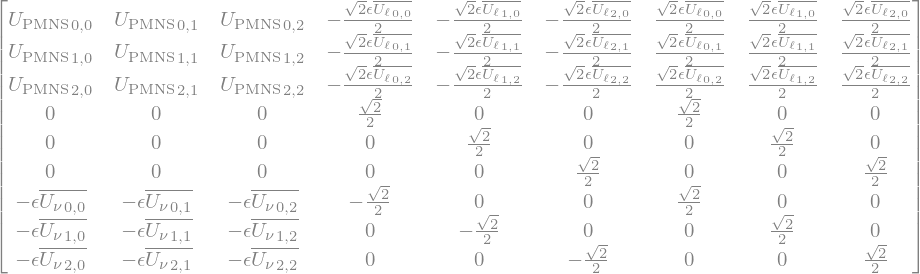

In [75]:
Uf_explicit = Uf.subs(Dagger(Ul)*conjugate(Unu), Upmns).subs(sin(epsilon), epsilon).replace(CN, cos(pi/4)*In).replace(SN, sin(pi/4)*In).as_explicit()
Uf_explicit

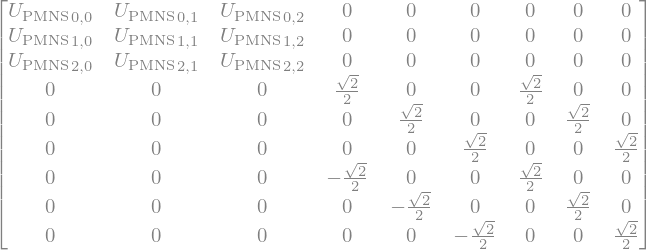

In [76]:
Uf_explicit.subs(epsilon, 0)

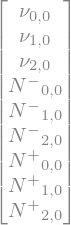

In [77]:
Nu.as_explicit()

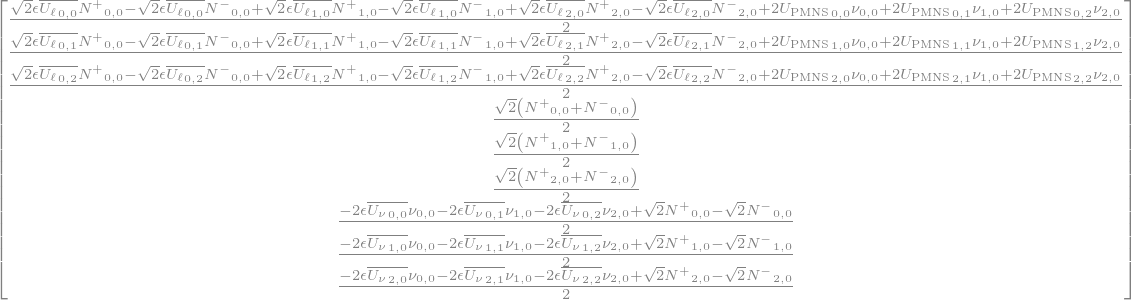

In [78]:
(Uf_explicit*Nu.as_explicit()).applyfunc(lambda x:x.factor())

## Second approach

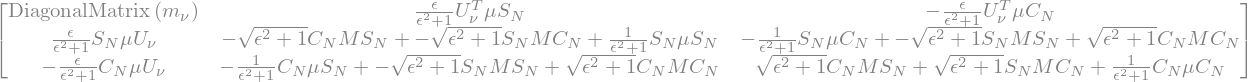

In [79]:
UnuTUNTUsTMLRissUsUNUnu2 = block_collapse(
    block_collapse(Unu_matrixT*UNTUsTMLRissUsUN*Unu_matrix).expand().subs(
        ((epsilon**2)/(1 + epsilon**2))*Unu.T*mu*Unu, mnu
    )#.subs(xi_approximations)
)
UnuTUNTUsTMLRissUsUNUnu2

In [80]:
th1 = symbols(r'\theta_1')
th2 = symbols(r'\theta_2')
th3 = symbols(r'\theta_3')

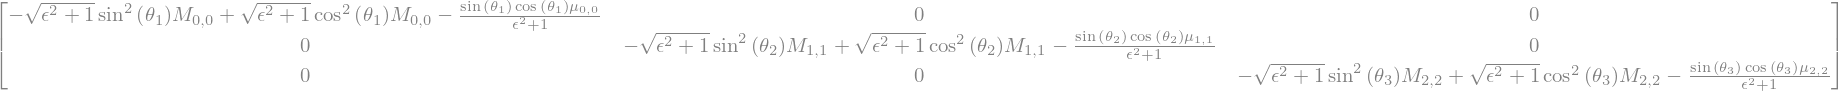

In [81]:
UnuTUNTUsTMLRissUsUNUnu2_12 = block_collapse(
    UnuTUNTUsTMLRissUsUNUnu2.blocks[2,1].subs(
        mu, DiagonalMatrix(mu),
    ).subs(
        MD, DiagonalMatrix(MD)
    ).subs(CN, DiagonalMatrix(CN)).subs(SN, DiagonalMatrix(SN)).expand()
).as_explicit().applyfunc(lambda x:x.factor().subs(
    {
        SN[0,0]:sin(th1),
        CN[0,0]:cos(th1),
        SN[1,1]:sin(th2),
        CN[1,1]:cos(th2),
        SN[2,2]:sin(th3),
        CN[2,2]:cos(th3) 
    }
).expand().collect([sin(th1), cos(th1), sin(th2), cos(th2), sin(th3), cos(th3)], lambda x:x.factor())
)
UnuTUNTUsTMLRissUsUNUnu2_12

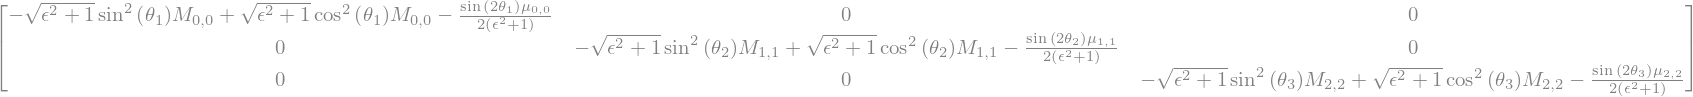

In [82]:
UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp = UnuTUNTUsTMLRissUsUNUnu2_12.applyfunc(lambda x:x.trigsimp())
UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp

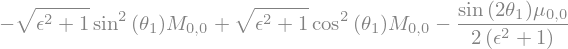

In [83]:
UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp_th1 = UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp[0,0]
UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp_th2 = UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp[1,1]
UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp_th3 = UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp[2,2]
UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp_th1

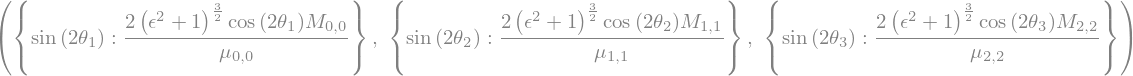

In [84]:
sin2th1_sol = solve(UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp_th1, sin(2*th1), dict=True)[0]
sin2th2_sol = solve(UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp_th2, sin(2*th2), dict=True)[0]
sin2th3_sol = solve(UnuTUNTUsTMLRissUsUNUnu2_12_trigsimp_th3, sin(2*th3), dict=True)[0]
sin2th1_sol, sin2th2_sol, sin2th3_sol

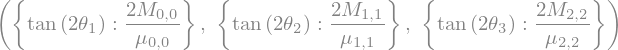

In [85]:
tan2th1_sol = {tan(2*th1):(sin2th1_sol[sin(2*th1)]/cos(2*th1)).subs(epsilon, 0)}
tan2th2_sol = {tan(2*th2):(sin2th2_sol[sin(2*th2)]/cos(2*th2)).subs(epsilon, 0)}
tan2th3_sol = {tan(2*th3):(sin2th3_sol[sin(2*th3)]/cos(2*th3)).subs(epsilon, 0)}
tan2th1_sol, tan2th2_sol, tan2th3_sol

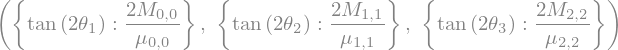

In [86]:
tan2th1_sol[tan(2*th1)] = tan2th1_sol[tan(2*th1)].series(epsilon, 0, 3).removeO().factor()
tan2th2_sol[tan(2*th2)] = tan2th2_sol[tan(2*th2)].series(epsilon, 0, 3).removeO().factor()
tan2th3_sol[tan(2*th3)] = tan2th3_sol[tan(2*th3)].series(epsilon, 0, 3).removeO().factor()
tan2th1_sol, tan2th2_sol, tan2th3_sol

In [87]:
from sympy import fraction

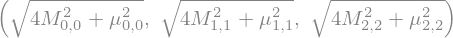

In [88]:
co2th1, ca2th1 = fraction(tan2th1_sol[tan(2*th1)])
h2th1 = sqrt(co2th1**2 + ca2th1**2)
co2th2, ca2th2 = fraction(tan2th2_sol[tan(2*th2)])
h2th2 = sqrt(co2th2**2 + ca2th2**2)
co2th3, ca2th3 = fraction(tan2th3_sol[tan(2*th3)])
h2th3 = sqrt(co2th3**2 + ca2th3**2)
h2th1, h2th2, h2th3

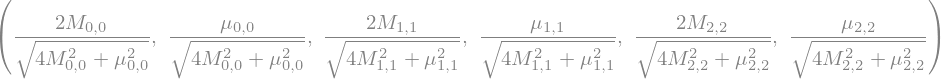

In [89]:
sin2th1 = (co2th1/h2th1).series(epsilon, 0, 3).removeO().factor()
cos2th1 = (ca2th1/h2th1).series(epsilon, 0, 3).removeO().factor()
sin2th2 = (co2th2/h2th2).series(epsilon, 0, 3).removeO().factor()
cos2th2 = (ca2th2/h2th2).series(epsilon, 0, 3).removeO().factor()
sin2th3 = (co2th3/h2th3).series(epsilon, 0, 3).removeO().factor()
cos2th3 = (ca2th3/h2th3).series(epsilon, 0, 3).removeO().factor()
sin2th1, cos2th1, sin2th2, cos2th2, sin2th3, cos2th3

Rememberin the identity
$$\tan \theta = \frac{1 - \cos{2 \theta}}{\sin{2 \theta}}$$

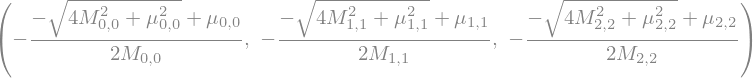

In [90]:
tanth1 = ((1 - cos2th1)/sin2th1).series(epsilon, 0, 3).removeO().factor()
tanth2 = ((1 - cos2th2)/sin2th2).series(epsilon, 0, 3).removeO().factor()
tanth3 = ((1 - cos2th3)/sin2th3).series(epsilon, 0, 3).removeO().factor()
tanth1, tanth2, tanth3

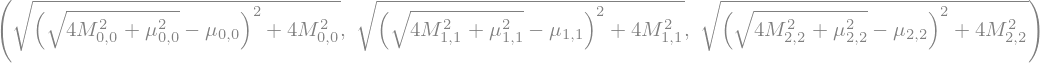

In [91]:
coth1, cath1 = fraction(tanth1)
hth1 = sqrt(coth1**2 + cath1**2)
coth2, cath2 = fraction(tanth2)
hth2 = sqrt(coth2**2 + cath2**2)
coth3, cath3 = fraction(tanth3)
hth3 = sqrt(coth3**2 + cath3**2)
hth1, hth2, hth3

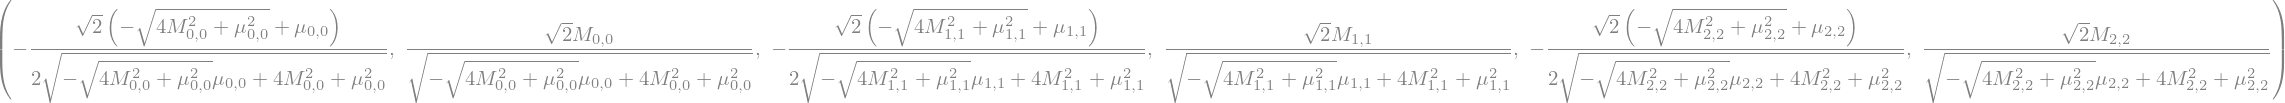

In [92]:
sinth1 = (coth1/hth1).series(epsilon, 0, 3).removeO().factor()
costh1 = (cath1/hth1).series(epsilon, 0, 3).removeO().factor()
sinth2 = (coth2/hth2).series(epsilon, 0, 3).removeO().factor()
costh2 = (cath2/hth2).series(epsilon, 0, 3).removeO().factor()
sinth3 = (coth3/hth3).series(epsilon, 0, 3).removeO().factor()
costh3 = (cath3/hth3).series(epsilon, 0, 3).removeO().factor()
sinth1, costh1, sinth2, costh2, sinth3, costh3

In [93]:
from sympy import Dummy

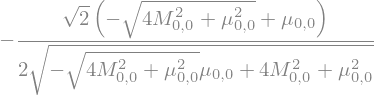

In [94]:
sinth1

$$r = \frac{\mu_{ii}}{2 M_{Di}}$$

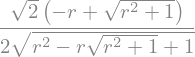

In [95]:
r = symbols('r', positive=True)
mupos = Dummy('mu', positive=True)
sinth1.subs(MD[0,0], mu[0,0]/(2*r)).subs(mu[0,0], mupos).simplify().subs(mupos, mu[0,0])

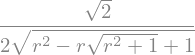

In [96]:
costh1.subs(MD[0,0], mu[0,0]/(2*r)).subs(mu[0,0], mupos).simplify().subs(mupos, mu[0,0])

In [97]:
tanth1 = (sinth1/costh1).subs(MD[0,0], mu[0,0]/(2*r)).subs(mu[0,0], mupos).simplify().subs(mupos, mu[0,0]).factor(deep=True)
tanth1

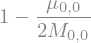

In [98]:
tanth1.subs(MD[0,0], mu[0,0]/(2*r)).subs(mu[0,0], mupos).simplify().subs(mupos, mu[0,0]).series(r, 0, 2).removeO().factor().subs(r, mu[0,0]/(2*MD[0,0])).expand()

In [99]:
tan(pi/4)

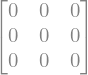

In [100]:
UnuTUNTUsTMLRissUsUNUnu2_12.subs(
    {
        sin(th1): sinth1,
        cos(th1): costh1,
        sin(th2): sinth2,
        cos(th2): costh2,
        sin(th3): sinth3,
        cos(th3): costh3,
    }
).applyfunc(lambda x:x.subs(epsilon, 0).factor())

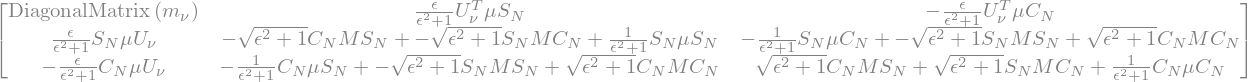

In [101]:
UnuTUNTUsTMLRissUsUNUnu2

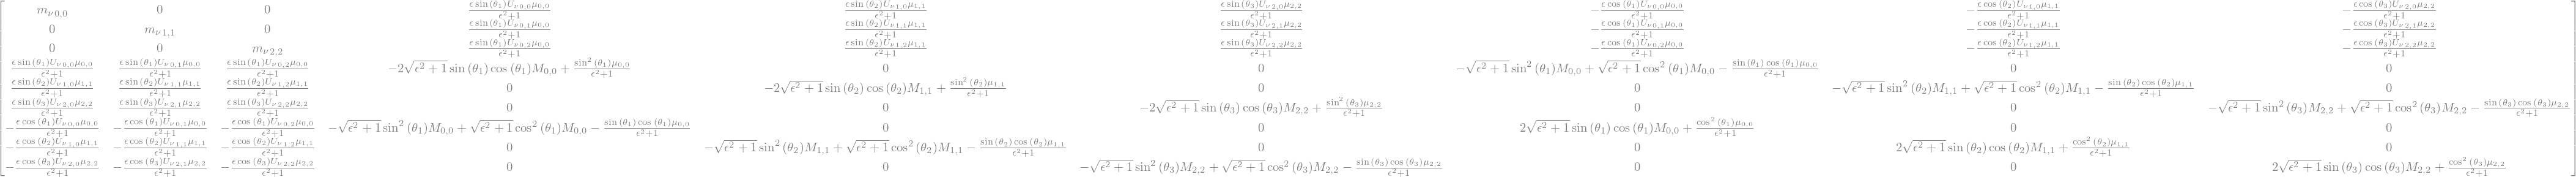

In [102]:
UnuTUNTUsTMLRissUsUNUnu2_explicit = block_collapse(
    UnuTUNTUsTMLRissUsUNUnu2.subs(
        mu, DiagonalMatrix(mu),
    ).subs(
        MD, DiagonalMatrix(MD)
    ).subs(CN, DiagonalMatrix(CN)).subs(SN, DiagonalMatrix(SN)).expand()
).as_explicit().applyfunc(lambda x:x.factor().subs(
    {
        SN[0,0]:sin(th1),
        CN[0,0]:cos(th1),
        SN[1,1]:sin(th2),
        CN[1,1]:cos(th2),
        SN[2,2]:sin(th3),
        CN[2,2]:cos(th3) 
    }
).expand().collect([sin(th1), cos(th1), sin(th2), cos(th2), sin(th3), cos(th3)], lambda x:x.factor())
)
UnuTUNTUsTMLRissUsUNUnu2_explicit.applyfunc(lambda x:x.collect([sin(th1), cos(th1), sin(th2), cos(th2), sin(th3), cos(th3)], lambda x:x.factor()))

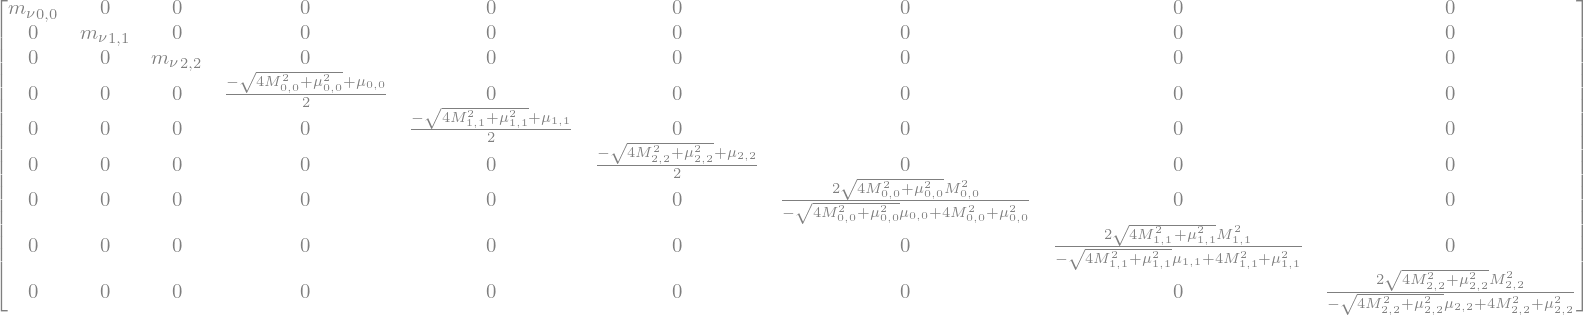

In [103]:
eigenvalsMnu = UnuTUNTUsTMLRissUsUNUnu2_explicit.subs(
    {
        sin(th1): sinth1,
        cos(th1): costh1,
        sin(th2): sinth2,
        cos(th2): costh2,
        sin(th3): sinth3,
        cos(th3): costh3,
    }
).applyfunc(lambda x:x.subs(epsilon,0).factor())
eigenvalsMnu

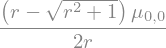

In [104]:
eigenvalsMnu[3,3].subs(MD[0,0], mu[0,0]/(2*r)).subs(mu[0,0], mupos).simplify().subs(mupos, mu[0,0])

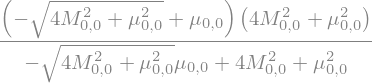

In [105]:
(eigenvalsMnu[3,3] - eigenvalsMnu[6,6]).factor()

In [106]:
(eigenvalsMnu[3,3] + eigenvalsMnu[6,6]).factor()

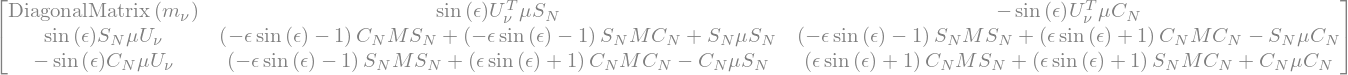

In [107]:
UnuTUNTUsTMLRissUsUNUnu_sinxi2 = block_collapse(
    block_collapse(Unu_matrixT*UNTUsTMLRissUsUN_sinxi*Unu_matrix).expand().subs(
        (sin(epsilon)**2)*Unu.T*mu*Unu, mnu
    )#.subs(xi_approximations)
)
UnuTUNTUsTMLRissUsUNUnu_sinxi2

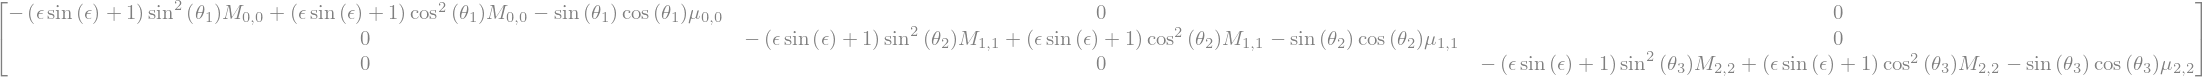

In [108]:
UnuTUNTUsTMLRissUsUNUnu_sinxi2_12 = block_collapse(
    UnuTUNTUsTMLRissUsUNUnu_sinxi2.blocks[2,1].subs(
        mu, DiagonalMatrix(mu),
    ).subs(
        MD, DiagonalMatrix(MD)
    ).subs(CN, DiagonalMatrix(CN)).subs(SN, DiagonalMatrix(SN)).expand()
).as_explicit().applyfunc(lambda x:x.factor().subs(
    {
        SN[0,0]:sin(th1),
        CN[0,0]:cos(th1),
        SN[1,1]:sin(th2),
        CN[1,1]:cos(th2),
        SN[2,2]:sin(th3),
        CN[2,2]:cos(th3) 
    }
).expand().collect([sin(th1), cos(th1), sin(th2), cos(th2), sin(th3), cos(th3)], lambda x:x.factor())
)
UnuTUNTUsTMLRissUsUNUnu_sinxi2_12

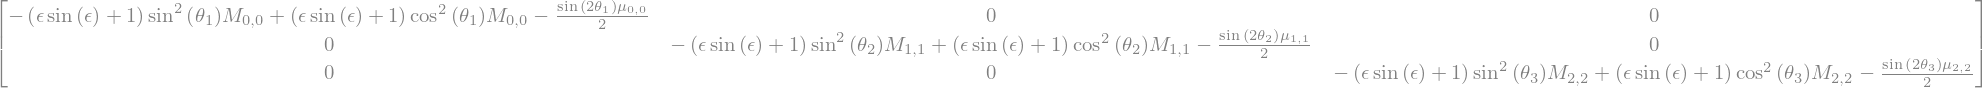

In [109]:
UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp = UnuTUNTUsTMLRissUsUNUnu_sinxi2_12.applyfunc(lambda x:x.trigsimp())
UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp

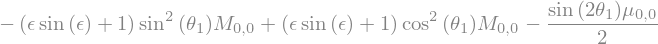

In [110]:
UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp_th1 = UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp[0,0]
UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp_th2 = UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp[1,1]
UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp_th3 = UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp[2,2]
UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp_th1

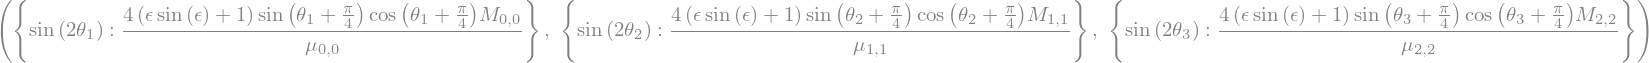

In [111]:
sin2th1_sol_sinxi = solve(UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp_th1, sin(2*th1), dict=True)[0]
sin2th2_sol_sinxi = solve(UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp_th2, sin(2*th2), dict=True)[0]
sin2th3_sol_sinxi = solve(UnuTUNTUsTMLRissUsUNUnu_sinxi2_12_trigsimp_th3, sin(2*th3), dict=True)[0]
sin2th1_sol_sinxi, sin2th2_sol_sinxi, sin2th3_sol_sinxi

In [112]:
from sympy import Function

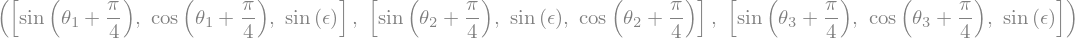

In [113]:
trig_sin2th1 = list(sin2th1_sol_sinxi[sin(2*th1)].atoms(Function))#.remove(sin(epsilon))
trig_sin2th2 = list(sin2th2_sol_sinxi[sin(2*th2)].atoms(Function))#.remove(sin(epsilon))
trig_sin2th3 = list(sin2th3_sol_sinxi[sin(2*th3)].atoms(Function))#.remove(sin(epsilon))
trig_sin2th1, trig_sin2th2, trig_sin2th3

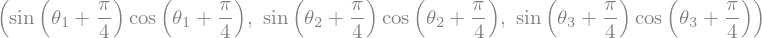

In [114]:
mul_sin2th1 = 1
for trig in trig_sin2th1:
    if not trig.has(epsilon):
        mul_sin2th1 *= trig
mul_sin2th2 = 1
for trig in trig_sin2th2:
    if not trig.has(epsilon):
        mul_sin2th2 *= trig
mul_sin2th3 = 1
for trig in trig_sin2th3:
    if  not trig.has(epsilon):
        mul_sin2th3 *= trig
mul_sin2th1, mul_sin2th2, mul_sin2th3

In [115]:
sin2th1_sol_sinxi[sin(2*th1)] = sin2th1_sol_sinxi[sin(2*th1)].subs(mul_sin2th1, mul_sin2th1.trigsimp())
sin2th2_sol_sinxi[sin(2*th2)] = sin2th2_sol_sinxi[sin(2*th2)].subs(mul_sin2th2, mul_sin2th2.trigsimp())
sin2th3_sol_sinxi[sin(2*th3)] = sin2th3_sol_sinxi[sin(2*th3)].subs(mul_sin2th3, mul_sin2th3.trigsimp())


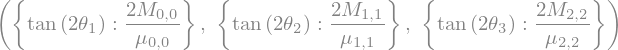

In [116]:
tan2th1_sol_sinxi = {tan(2*th1):(sin2th1_sol_sinxi[sin(2*th1)]/cos(2*th1)).subs(epsilon, 0)}
tan2th2_sol_sinxi = {tan(2*th2):(sin2th2_sol_sinxi[sin(2*th2)]/cos(2*th2)).subs(epsilon, 0)}
tan2th3_sol_sinxi = {tan(2*th3):(sin2th3_sol_sinxi[sin(2*th3)]/cos(2*th3)).subs(epsilon, 0)}
tan2th1_sol, tan2th2_sol, tan2th3_sol

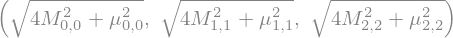

In [117]:
co2th1_sinxi, ca2th1_sinxi = fraction(tan2th1_sol_sinxi[tan(2*th1)])
h2th1_sinxi = sqrt(co2th1_sinxi**2 + ca2th1_sinxi**2)
co2th2_sinxi, ca2th2_sinxi = fraction(tan2th2_sol_sinxi[tan(2*th2)])
h2th2_sinxi = sqrt(co2th2_sinxi**2 + ca2th2_sinxi**2)
co2th3_sinxi, ca2th3_sinxi = fraction(tan2th3_sol_sinxi[tan(2*th3)])
h2th3_sinxi = sqrt(co2th3_sinxi**2 + ca2th3_sinxi**2)
h2th1_sinxi, h2th2_sinxi, h2th3_sinxi

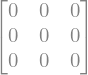

In [118]:
UnuTUNTUsTMLRissUsUNUnu_sinxi2_12.subs(
    {
        sin(th1): sinth1,
        cos(th1): costh1,
        sin(th2): sinth2,
        cos(th2): costh2,
        sin(th3): sinth3,
        cos(th3): costh3,
    }
).applyfunc(lambda x:x.subs(epsilon, 0).factor())

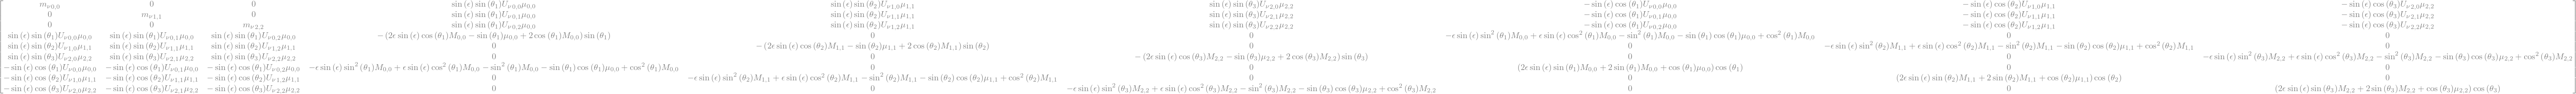

In [119]:
UnuTUNTUsTMLRissUsUNUnu_sinxi2_explicit = block_collapse(
    UnuTUNTUsTMLRissUsUNUnu_sinxi2.subs(
        mu, DiagonalMatrix(mu),
    ).subs(
        MD, DiagonalMatrix(MD)
    ).subs(CN, DiagonalMatrix(CN)).subs(SN, DiagonalMatrix(SN)).expand()
).as_explicit().applyfunc(lambda x:x.factor().subs(
    {
        SN[0,0]:sin(th1),
        CN[0,0]:cos(th1),
        SN[1,1]:sin(th2),
        CN[1,1]:cos(th2),
        SN[2,2]:sin(th3),
        CN[2,2]:cos(th3) 
    }
).expand().collect([sin(th1), cos(th1), sin(th2), cos(th2), sin(th3), cos(th3)], lambda x:x.factor())
)
UnuTUNTUsTMLRissUsUNUnu_sinxi2_explicit.applyfunc(lambda x:x.collect([sin(epsilon)], lambda x:x.factor()))

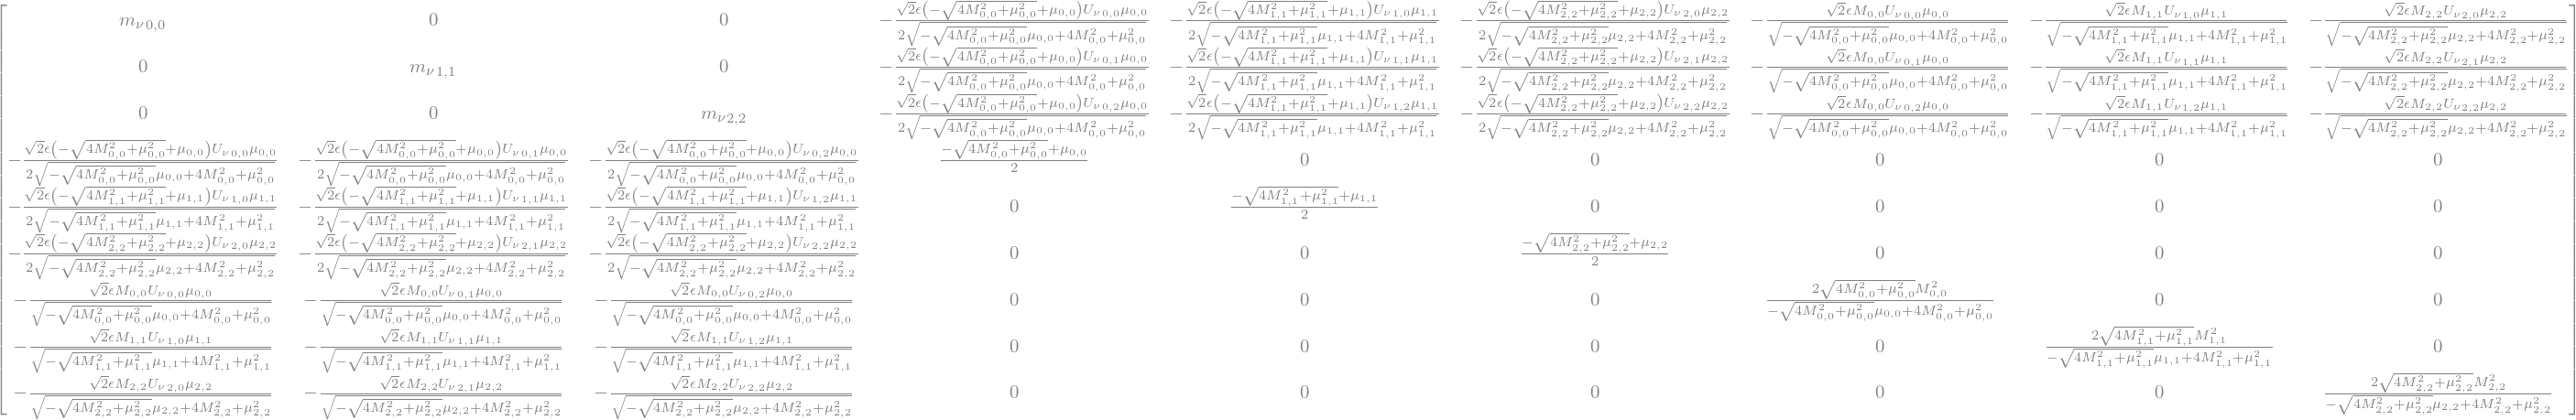

In [120]:
eigenvalsMnu_sinxi = UnuTUNTUsTMLRissUsUNUnu_sinxi2_explicit.subs(
    {
        sin(th1): sinth1,
        cos(th1): costh1,
        sin(th2): sinth2,
        cos(th2): costh2,
        sin(th3): sinth3,
        cos(th3): costh3,
    }
).applyfunc(lambda x:x.subs(sin(epsilon), epsilon).replace(epsilon**2, 0).factor())
eigenvalsMnu_sinxi

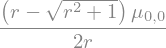

In [121]:
Mnu4 = eigenvalsMnu_sinxi[3, 3].subs(MD[0,0], mu[0,0]/(2*r)).subs(mu[0,0], mupos).simplify().subs(mupos, mu[0,0]).simplify()
Mnu4

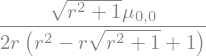

In [122]:
Mnu7 = eigenvalsMnu_sinxi[6, 6].subs(MD[0,0], mu[0,0]/(2*r)).subs(mu[0,0], mupos).simplify().subs(mupos, mu[0,0]).simplify()
Mnu7

In [123]:
(Mnu4 + Mnu7).simplify()

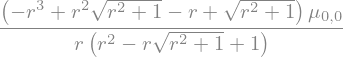

In [124]:
(Mnu7 - Mnu4).simplify()

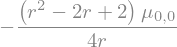

In [125]:
Mnu4_approx = Mnu4.series(r, 0, 2).removeO().factor()
Mnu4_approx

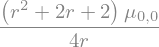

In [126]:
Mnu7_approx = Mnu7.series(r, 0, 2).removeO().factor()
Mnu7_approx

In [127]:
(Mnu4_approx + Mnu7_approx).simplify()

In [128]:
t = 246/1e5
t, t**2

### Physical states

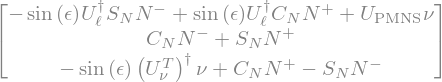

In [129]:
Nuweak = block_collapse(Uf*Nu).subs(Dagger(Ul)*conjugate(Unu), Upmns).factor()
Nuweak

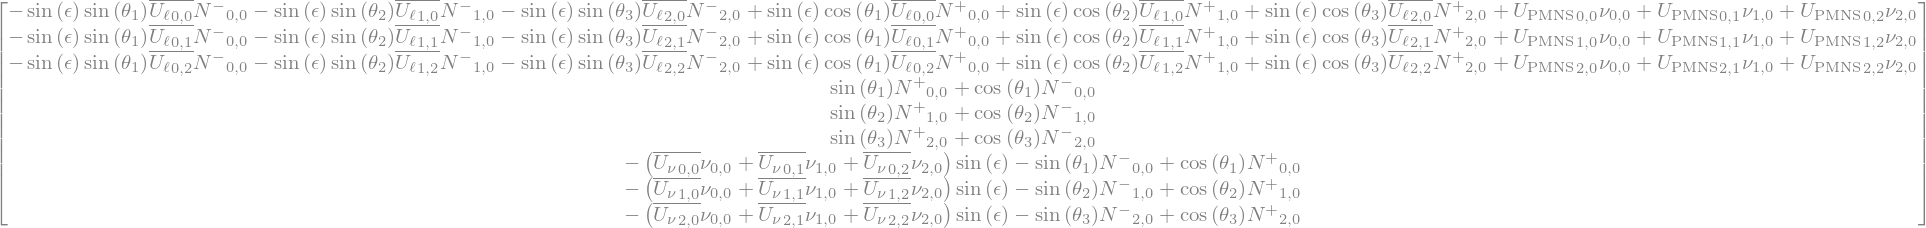

In [130]:
Nuweak_explicit = (Nuweak.subs(CN, DiagonalMatrix(CN)).subs(SN, DiagonalMatrix(SN)).expand()).as_explicit().applyfunc(lambda x:x.factor().subs(
    {
        SN[0,0]:sin(th1),
        CN[0,0]:cos(th1),
        SN[1,1]:sin(th2),
        CN[1,1]:cos(th2),
        SN[2,2]:sin(th3),
        CN[2,2]:cos(th3) 
    }
).expand().collect([sin(th1), cos(th1), sin(th2), cos(th2), sin(th3), cos(th3)], lambda x:x.factor()))
Nuweak_explicit

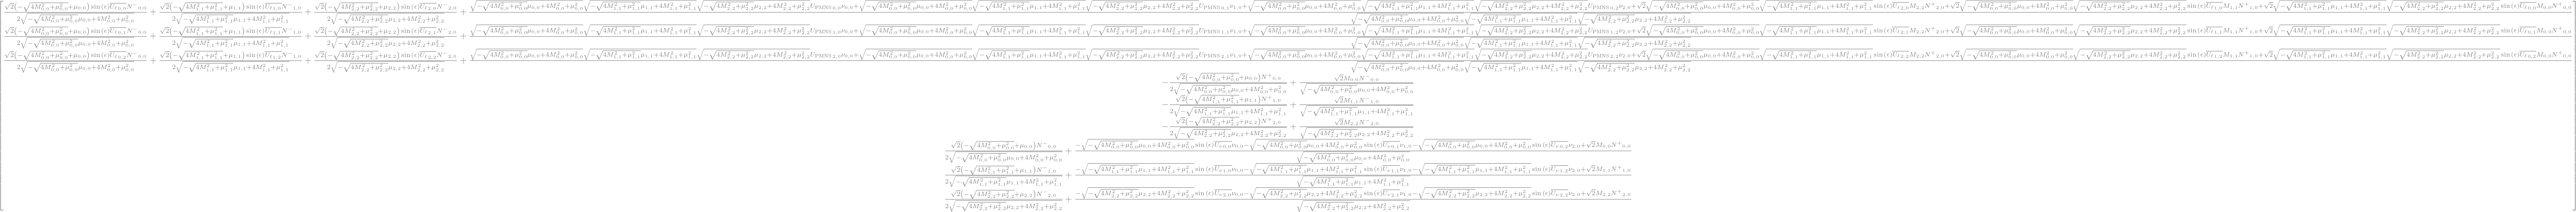

In [131]:
Nuweak_explicit.subs(
    {
        sin(th1): sinth1,
        cos(th1): costh1,
        sin(th2): sinth2,
        cos(th2): costh2,
        sin(th3): sinth3,
        cos(th3): costh3,
    }
).applyfunc(lambda x:x.expand().collect([Nm[0,0], Nm[1,0], Nm[2,0]], lambda x:x.factor()))

## Rotation in general

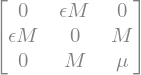

In [132]:
MLRiss_mDp0

In [133]:
ULL = MatrixSymbol('U_{LL}', 3,3)
ULR = MatrixSymbol('U_{LR}', 3,3)
ULS = MatrixSymbol('U_{LS}', 3,3)
URL = MatrixSymbol('U_{RL}', 3,3)
URR = MatrixSymbol('U_{RR}', 3,3)
URS = MatrixSymbol('U_{RS}', 3,3)
USL = MatrixSymbol('U_{SL}', 3,3)
USR = MatrixSymbol('U_{SR}', 3,3)
USS = MatrixSymbol('U_{SS}', 3,3)

The unitarity matrix for rotation of neutrino mass matrix should be unitarity and symmetric 
$$U^\dagger U = \mathbb{I} $$
$$U^T =  U $$

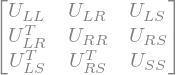

In [134]:
Unu = BlockMatrix(
    [
        [ULL, ULR, ULS],
        [ULR.T, URR, URS],
        [ULS.T, URS.T, USS]
    ]
)
Unu

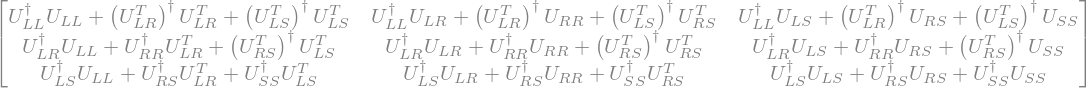

In [135]:
UnuDaggerUnu = block_collapse(Dagger(Unu)*Unu)
UnuDaggerUnu

In [136]:
from sympy import Eq, Add

In [137]:
unitarity_conditions_Unu = {}
unitarity_equations_Unu = []
for i in range(3):
    for j in range(3):
        Cij = UnuDaggerUnu.blocks[i,j]
        if i == j:
            unitarity_conditions_Unu[Cij] = Identity(3)
            eqij = Eq(Cij, Identity(3))
        else:
            unitarity_conditions_Unu[Cij] = ZeroMatrix(3,3)
            eqij = Eq(Cij, ZeroMatrix(3,3))
        unitarity_equations_Unu.append(eqij)


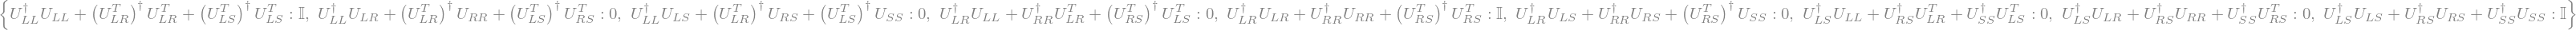

In [138]:
unitarity_conditions_Unu

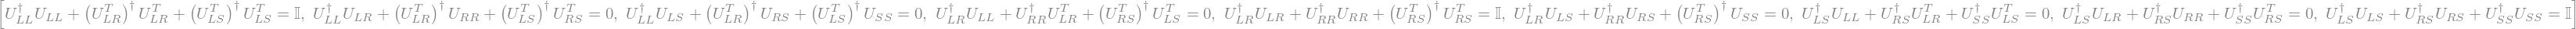

In [139]:
unitarity_equations_Unu

In [140]:
# Solve for the primary diagonal terms
solved_conditions = []
solved_condition_dict = {}

# Solve each equation for a target term
for eq in unitarity_equations_Unu:
    lhs = eq.lhs
    terms = lhs.as_ordered_terms()
    
    # Try to isolate the first term in the equation
    primary_term = terms[0]
    other_terms = Add(*[-term for term in terms[1:]])
    
    # Solve for the primary term
    solved_condition = Eq(primary_term, (eq.rhs + other_terms ))
    solved_conditions.append(solved_condition)
    solved_condition_dict[solved_condition.lhs] = solved_condition.rhs


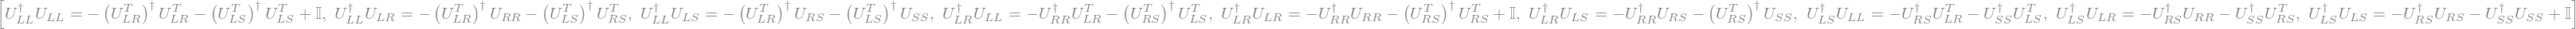

In [ ]:
solved_conditions

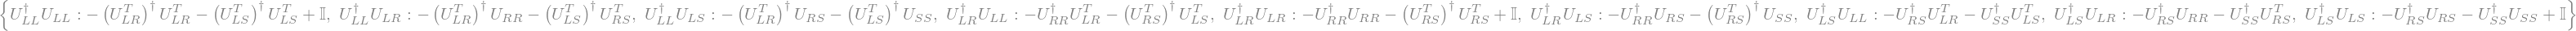

In [ ]:
solved_condition_dict

In [ ]:
for solved_condition in solved_conditions:
    display(solved_condition)

In [ ]:
solved_condition_dict[Dagger(ULL)*ULR]

In [ ]:
solved_condition_dict[Dagger(Dagger(ULL)*ULR)]

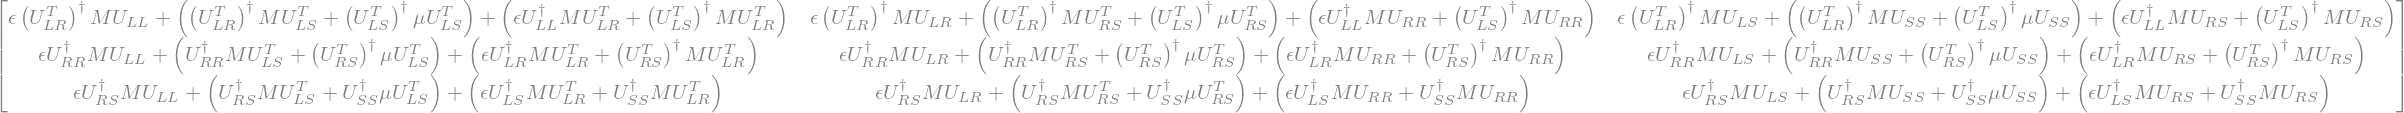

In [ ]:
UnuDaggerMnuUnu = block_collapse(Dagger(Unu)*MLRiss_mDp0*Unu).expand()
UnuDaggerMnuUnu

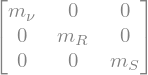

In [ ]:
mnu = MatrixSymbol(r'm_\nu', 3,3)
mR = MatrixSymbol('m_R', 3,3)
mS = MatrixSymbol('m_S', 3,3)
Z3 = ZeroMatrix(3, 3)
Mnu_diag = BlockMatrix(
    [
        [mnu, Z3, Z3],
        [Z3, mR, Z3],
        [Z3, Z3, mS]
    ]
)
Mnu_diag

In [ ]:
mass_basis_conditions_Unu = {}
mass_basis_equations_Unu = []
for i in range(3):
    for j in range(3):
        Cij = UnuDaggerMnuUnu.blocks[i,j]
        Mij = Mnu_diag.blocks[i,j]
        mass_basis_conditions_Unu[Cij] = Mij
        eqij = Eq(Cij, Mij)
        mass_basis_equations_Unu.append(eqij)

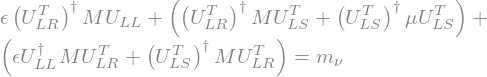

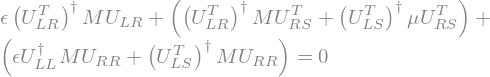

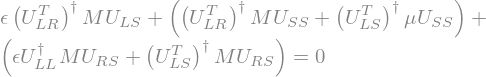

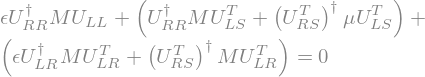

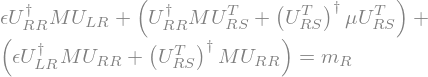

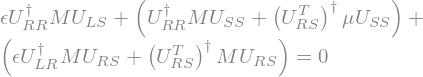

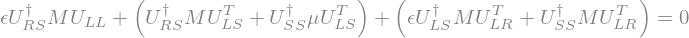

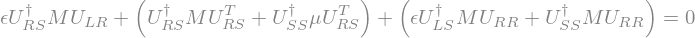

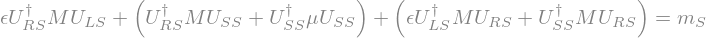

In [ ]:
for eq in  mass_basis_equations_Unu:
    display(eq)


In [ ]:
from sympy import symbols, groebner, Eq, I, Matrix

# Define real and imaginary parts of the complex variables
a11, b11 = symbols('a11 b11', real=True)
a12, b12 = symbols('a12 b12', real=True)
a13, b13 = symbols('a13 b13', real=True)
a22, b22 = symbols('a22 b22', real=True)
a23, b23 = symbols('a23 b23', real=True)
a33, b33 = symbols('a33 b33', real=True)

epsilon, M, mu, mnu, mR, mS = symbols('epsilon M mu m_nu m_R m_S', positive=True)

# Define the original mass matrix
Mnu = Matrix([
    [0, epsilon * M, 0],
    [epsilon * M, 0, M],
    [0, M, mu]
])

# Define the expected diagonal mass matrix
Mnu_diag = Matrix([
    [mnu, 0, 0],
    [0, mR, 0],
    [0, 0, mS]
])

# Substitute Uij as complex variables with real and imaginary components
U11 = a11 + I * b11
U12 = a12 + I * b12
U13 = a13 + I * b13
U22 = a22 + I * b22
U23 = a23 + I * b23
U33 = a33 + I * b33

# Construct U and U†
U = Matrix([
    [U11, U12, U13],
    [U12, U22, U23],
    [U13, U23, U33]
])

U_dagger = Dagger(U)


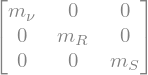

In [ ]:
Mnu_diag

In [232]:
unitarity_equations = []
UDU = (U_dagger*U).applyfunc(lambda x:x.expand())
#display(UDMnuU)
for i in range(3):
    for j in range(3):
        UDU_ij = UDU[i,j].expand()
        UDU_ij_im = UDU_ij.coeff(I).collect([M, mu])
        UDU_ij_re = (UDU_ij - UDU_ij_im*I).simplify().expand().collect([M, mu])
        #display(UDMnuU_ij_re)
        #display(UDMnuU_ij_im)
        if i==j:
            eq_re = Eq(UDU_ij_re, 1)
        else:
            eq_re = Eq(UDU_ij_re, 0)
        
        eq_im = Eq(UDU_ij_im, 0)
        if eq_re not in unitarity_equations:
            unitarity_equations.append(eq_re)
        if UDU_ij_im != 0:
            if eq_im not in unitarity_equations:
                unitarity_equations.append(eq_im)
        else:
            print(f'i = {i}, j = {j}')
            display(UDU_ij_im)
            

len(unitarity_equations)

i = 0, j = 0


i = 1, j = 1


i = 2, j = 2


In [233]:
unitarity_equations

In [234]:
# Solve for the primary diagonal terms
solved_conditions_unitariry = []
solved_conditions_unitarity_dict = {}

# Solve each equation for a target term
for eq in unitarity_equations:
    lhs = eq.lhs.expand()
    terms = lhs.as_ordered_terms()
    
    # Try to isolate the first term in the equation
    primary_term = terms[0]
    other_terms = Add(*[-term for term in terms[1:]])
    
    # Solve for the primary term
    solved_condition = Eq(primary_term, (eq.rhs + other_terms ))
    solved_conditions_unitariry.append(solved_condition)
    solved_conditions_unitarity_dict[solved_condition.lhs] = solved_condition.rhs

In [235]:
solved_conditions_unitarity_dict

In [216]:
from sympy import re, im

# Original mass matrix equations with complex variables
#mass_matrix_equations = []
UDMnuU = (U_dagger*Mnu*U).applyfunc(lambda x:x.expand().collect([M, mu]))
#display(UDMnuU)
#for i in range(3):
#    for j in range(3):
#        UDMnuU_ij = UDMnuU[i,j].expand()
#        UDMnuU_ij_im = UDMnuU_ij.coeff(I).collect([M, mu])
#        UDMnuU_ij_re = (UDMnuU_ij - UDMnuU_ij_im*I).simplify().expand().collect([M, mu])
#        #display(UDMnuU_ij_re)
#        #display(UDMnuU_ij_im)
#        eq_re = Eq(UDMnuU_ij_re, Mnu_diag[i,j])
#        eq_im = Eq(UDMnuU_ij_im, 0)
#        if eq_re not in mass_matrix_equations:
#            mass_matrix_equations.append(eq_re)
#        if UDMnuU_ij_im != 0:
#            if eq_im not in mass_matrix_equations:
#                mass_matrix_equations.append(eq_im)
#        else:
#            print(f'i = {i}, j = {j}')
            

#len(mass_matrix_equations)

In [243]:
from sympy import I, Eq, Matrix, conjugate, symbols, expand, collect, simplify

def optimize_mass_matrix_equations(U_dagger, Mnu, U, Mnu_diag):
    """
    Optimizes the calculation of mass matrix equations.

    This function takes the input matrices U_dagger, Mnu, U, and Mnu_diag, 
    calculates the product U_dagger * Mnu * U, and extracts the real and 
    imaginary parts of each element to form mass matrix equations. It optimizes 
    the process by reducing redundant calculations and streamlining equation 
    generation.

    Args:
        U_dagger: The Hermitian conjugate of the mixing matrix U.
        Mnu: The original neutrino mass matrix.
        U: The mixing matrix.
        Mnu_diag: The diagonalized neutrino mass matrix.

    Returns:
        A list of sympy equations representing the real and imaginary parts of 
        the mass matrix elements.
    """
    #M, mu = symbols('M, mu')  # Define M and mu only once

    mass_matrix_equations = []
    UDMnuU = (U_dagger * Mnu * U)

    for i in range(3):
        for j in range(3):
            UDMnuU_ij = UDMnuU[i, j].expand()
            
            # Efficiently separate real and imaginary parts
            if UDMnuU_ij.has(I):
                UDMnuU_ij_im = UDMnuU_ij.coeff(I).expand().collect([M, mu])
                UDMnuU_ij_re = (UDMnuU_ij - I * UDMnuU_ij_im).expand().collect([M, mu])
                
                # Avoid recalculation and simplify the conditions
                eq_re = Eq(UDMnuU_ij_re, Mnu_diag[i, j])
                eq_im = Eq(UDMnuU_ij_im, 0)
                
                if eq_re not in mass_matrix_equations:
                    mass_matrix_equations.append(eq_re)
                
                if UDMnuU_ij_im != 0 and eq_im not in mass_matrix_equations:
                    mass_matrix_equations.append(eq_im)
            else:
                eq_re = Eq(UDMnuU_ij.expand().collect([M, mu]), Mnu_diag[i,j])
                if eq_re not in mass_matrix_equations:
                    mass_matrix_equations.append(eq_re)
                print(f'i = {i}, j = {j}')

    return mass_matrix_equations


In [244]:
mass_matrix_equations_optimized = optimize_mass_matrix_equations(U_dagger, Mnu, U, Mnu_diag)

i = 0, j = 0
i = 1, j = 1
i = 2, j = 2


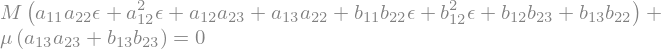

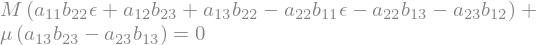

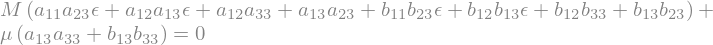

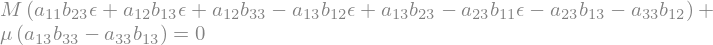

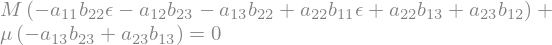

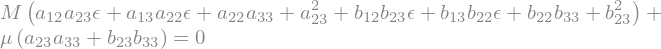

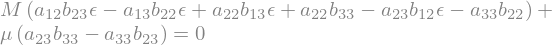

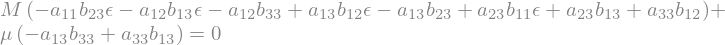

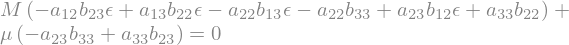

In [245]:
for uni in mass_matrix_equations_optimized:
    display(uni)

In [220]:
#mu_coeff_sols = solve(
#    mass_matrix_equations_optimized,
#    [eq.lhs.coeff(mu) for eq in mass_matrix_equations_optimized],
#    dict=True
#)[0]
#mu_coeff_sols

In [246]:
from sympy.core.relational import Relational

def optimize_mu_coeff_solving(mass_matrix_equations):
    """
    Optimizes the process of solving for coefficients of 'mu' in a system of equations.

    This function takes a list of SymPy equations (mass_matrix_equations), extracts the 
    coefficients of the symbol 'mu' from the left-hand side of each equation, and then 
    solves the system of equations for these coefficients. It optimizes this process 
    by:
        1.  Efficiently extracting coefficients without redundant operations.
        2.  Ensuring correct equation format for `solve`.
        3. Correctly handling symbolic values of equations
        4. Avoid recalculating the coefficients of mu.

    Args:
        mass_matrix_equations: A list of SymPy Eq objects representing the system of equations.

    Returns:
        A dictionary mapping each extracted coefficient (as a SymPy expression) to its 
        solved value in terms of other variables. If no solution is found or an error is raise returns an empty dictionary.
    """
    #mu = symbols('mu')  # Define mu
    
    try:
        # 1. Efficiently extract coefficients
        mu_coeffs = []
        for eq in mass_matrix_equations:
            if isinstance(eq, Relational) :
                mu_coeffs.append(eq.lhs.coeff(mu))
            else:
                raise TypeError("All elements of the list mass_matrix_equations must be instances of sympy.core.relational.Relational")

        # 2. Ensure correct equation format for `solve` 
        # Ensure that equations are of type Eq
        for eq in mass_matrix_equations:
            if not isinstance(eq, Eq):
                raise TypeError("All elements of the list mass_matrix_equations must be instances of sympy.Eq")
        # 3. Solving with the collected coefficients.    
        # Solve the equations for the mu coefficients.        
        mu_coeff_sols = solve(
            mass_matrix_equations,
            mu_coeffs,
            dict=True
        )

        # Check if a solution is found.
        if mu_coeff_sols:
            return mu_coeff_sols[0]
        else:
            print("Warning: No solution found for mu coefficients.")
            return {}

    except Exception as e:
        print(f"Error during solving: {e}")
        return {}

In [247]:
mu_coeff_sols = optimize_mu_coeff_solving(mass_matrix_equations_optimized)

In [248]:
list(mu_coeff_sols.keys())

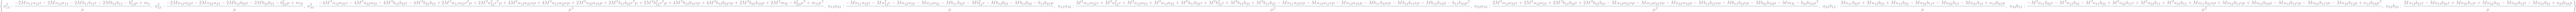

In [249]:
eqs_mu = []
for param, sol in mu_coeff_sols.items():
    eqi = Eq(param, sol)
    eqs_mu.append(eqi)

mu_coeff_sols2 = solve(eqs_mu, [a13**2, a23**2, a33**2, a13*a23, a13*a33, a23*a33, a23*b13, a33*b13, a33*b23], dict=True)[0]
mu_coeff_sols2

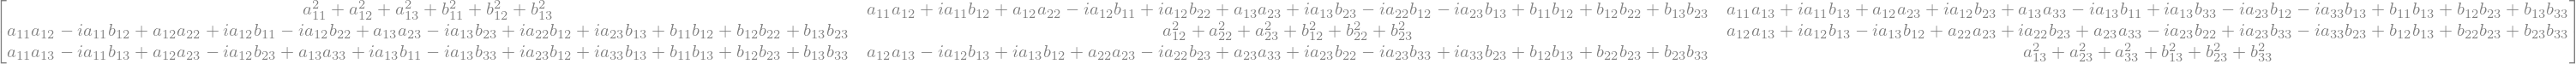

In [250]:
UDU = (Dagger(U)*U).applyfunc(lambda x:x.factor())
UDU

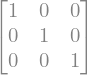

In [252]:
UDU.subs(solved_conditions_unitarity_dict).applyfunc(lambda x:x.expand())

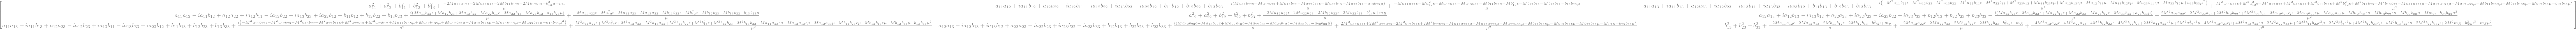

In [254]:
UDU.applyfunc(lambda x:x.expand().subs(mu_coeff_sols2))

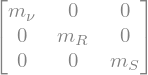

In [255]:
UDMnuU_unitarity = UDMnuU.applyfunc(lambda x:x.expand().subs(mu_coeff_sols2).expand())
UDMnuU_unitarity

In [ ]:
len(mu_coeff_sols2.keys())

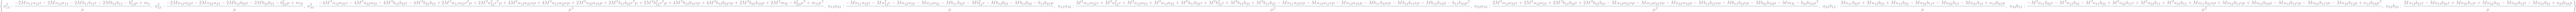

In [256]:
mu_coeff_sols2

In [257]:
solved_conditions_unitarity_dict

In [319]:
mu_coeff_eqs = []
for param, exp in  mu_coeff_sols2.items():
    lhs = param.subs(solved_conditions_unitarity_dict)
    rhs = exp.subs(solved_conditions_unitarity_dict).expand().collect([M,mu], lambda x:x.factor())
    eq = Eq((lhs - rhs).expand().collect([M,mu], lambda x:x.collect(epsilon, lambda x:x.factor())), 0)
    print(eq)
    mu_coeff_eqs.append(eq)

Eq(M*(-2*epsilon*(a12*a22 + a13*a23 + b12*b22 + b13*b23)/mu - 2*(a22*a23 + a23*a33 + b22*b23 + b23*b33)/mu) - a23**2 - a33**2 - b23**2 - b33**2 - m_nu/mu + 1, 0)
Eq(M*(2*epsilon*(a12*a22 + b12*b22)/mu + 2*(a22*a23 + b22*b23)/mu) + a23**2 + b23**2 - m_R/mu, 0)
Eq(M**3*(4*epsilon*(a12*a22 + b12*b22)/mu**3 + 4*(a22*a23 + b22*b23)/mu**3) + M**2*(-2*epsilon**2*(a11*a22 - a22**2 - a23**2 + b11*b22 - b22**2 - b23**2 + 1)/mu**2 - 4*epsilon*(a12*a23 + a13*a22 + b12*b23 + b13*b22)/mu**2 - 2*(a22*a33*mu + b22*b33*mu + m_R)/mu**3) + a33**2 + b33**2 - m_S/mu, 0)
Eq(M*(epsilon*(a11*a22 - a22**2 - a23**2 + b11*b22 - b22**2 - b23**2 + 1)/mu + (a12*a23 + a13*a22 + b12*b23 + b13*b22)/mu) + a13*a23 + b13*b23, 0)
Eq(M**2*(-epsilon*(a11*a22 - a22**2 - a23**2 + b11*b22 - b22**2 - b23**2 + 1)/mu**2 - (a12*a23 + a13*a22 + b12*b23 + b13*b22)/mu**2) + M*(epsilon*(a11*a23 - a22*a23 - a23*a33 + b11*b23 - b22*b23 - b23*b33)/mu + (a12*a33 + b12*b33)/mu) + a13*a33 + b13*b33, 0)
Eq(M**2*(-2*epsilon*(a12*a22 + b12*b22

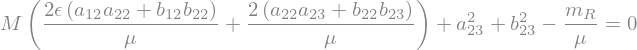

In [302]:
mu_coeff_eqs[1]

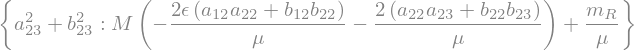

In [304]:
ab23_sol = solve(mu_coeff_eqs[1], a23**2 + b23**2, dict=True)[0]
ab23_sol[a23**2 + b23**2] = ab23_sol[a23**2 + b23**2].expand().collect([M,mu], lambda x:x.collect(epsilon, lambda x:x.factor()))
ab23_sol

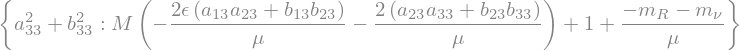

In [305]:
lhs0 = mu_coeff_eqs[0].lhs
rhs0 = mu_coeff_eqs[0].rhs
diff0 = lhs0 - rhs0
ab33_sol = solve((diff0.subs(ab23_sol).expand().collect([M,mu], lambda x:x.collect(epsilon, lambda x:x.factor()))), a33**2 + b33**2, dict=True)[0]
ab33_sol[a33**2 + b33**2] = ab33_sol[a33**2 + b33**2].expand().collect([M,mu], lambda x:x.collect(epsilon, lambda x:x.factor()))
ab33_sol

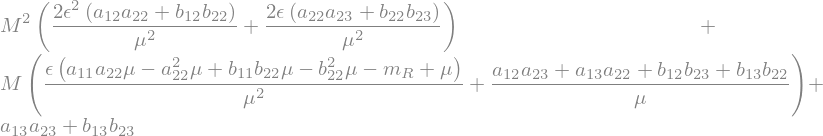

In [312]:
lhs3 = mu_coeff_eqs[3].lhs
rhs3 = mu_coeff_eqs[3].rhs
diff3 = (lhs3 - rhs3).subs(ab23_sol).expand().collect(
    [M,mu], lambda x:x.collect(epsilon, lambda x:x.factor())
)
diff3


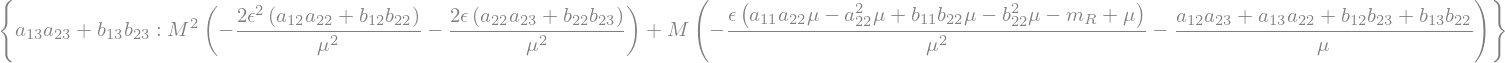

In [313]:

ab1323_sol = solve(diff3, a13*a23 + b13*b23, dict=True)[0]
ab1323_sol[a13*a23 + b13*b23] = ab1323_sol[a13*a23 + b13*b23].expand().collect([M,mu], lambda x:x.collect(epsilon, lambda x:x.factor()))
ab1323_sol

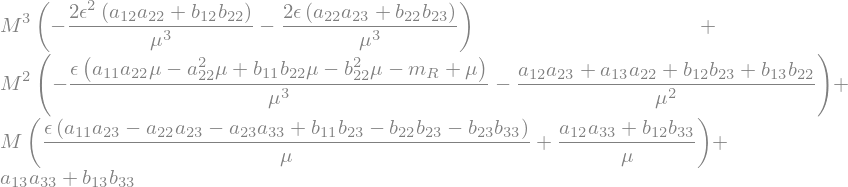

In [316]:
lhs4 = mu_coeff_eqs[4].lhs
rhs4 = mu_coeff_eqs[4].rhs
diff4 = (lhs4 - rhs4).subs(ab23_sol).expand().collect(
    [M,mu], lambda x:x.collect(epsilon, lambda x:x.factor())
)
diff4


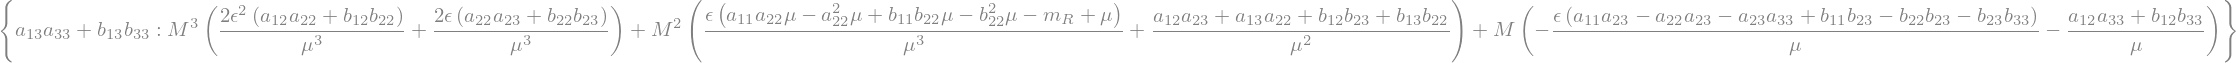

In [318]:
ab1333_sol = solve(diff4, a13*a33 + b13*b33, dict=True)[0]
ab1333_sol[a13*a33 + b13*b33] = ab1333_sol[a13*a33 + b13*b33].expand().collect([M,mu], lambda x:x.collect(epsilon, lambda x:x.factor()))
ab1333_sol

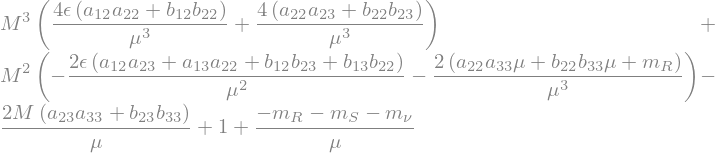

In [298]:
lhs2 = mu_coeff_eqs[2].lhs
rhs2 = mu_coeff_eqs[2].rhs
diff2 = lhs2 - rhs2
diff2.subs(ab33_sol).expand().collect(
    [M,mu], lambda x:x.collect(epsilon, lambda x:x.factor())
).subs(ab1323_sol).expand().collect(
    [M,mu], lambda x:x.collect(epsilon, lambda x:x.factor())
)